In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip uninstall opencv-python

Found existing installation: opencv-python 3.4.2.17
Uninstalling opencv-python-3.4.2.17:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/cv2/*
    /usr/local/lib/python3.7/dist-packages/opencv_python-3.4.2.17.dist-info/*
Proceed (y/n)? 

In [ ]:
!pip install --force-reinstall opencv-python==3.4.2.17
!pip install --force-reinstall opencv-contrib-python==3.4.2.17
import cv2

  Using cached opencv_python-3.4.2.17-cp37-cp37m-manylinux1_x86_64.whl (25.0 MB)
  Using cached numpy-1.21.3-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.3
    Uninstalling numpy-1.21.3:
      Successfully uninstalled numpy-1.21.3
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 3.4.2.17
    Uninstalling opencv-python-3.4.2.17:
      Successfully uninstalled opencv-python-3.4.2.17
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.6.0 requires numpy~=1.19.2, but you have numpy 1.21.3 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


  Using cached opencv_contrib_python-3.4.2.17-cp37-cp37m-manylinux1_x86_64.whl (30.6 MB)
  Using cached numpy-1.21.3-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.3
    Uninstalling numpy-1.21.3:
      Successfully uninstalled numpy-1.21.3
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 3.4.2.17
    Uninstalling opencv-contrib-python-3.4.2.17:
      Successfully uninstalled opencv-contrib-python-3.4.2.17
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.6.0 requires numpy~=1.19.2, but you have numpy 1.21.3 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which i

In [ ]:
from google.colab.patches import cv2_imshow
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
cv2.__version__

'3.4.2'

In [ ]:
path = '/content/drive/MyDrive/CSE-803-Computer-Vision/Homeworks/HW3/release_starter_files/r2/'
p1_path = '/content/drive/MyDrive/CSE-803-Computer-Vision/Homeworks/HW3/release_starter_files/'

In [ ]:
def save_img(img, path):
    cv2.imwrite(path, img)
    print(path, "is saved!")


def display_img(img):
    cv2.imshow('Result', img)
    cv2.waitKey()


def read_img(path):
    image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    # if need double type, uncomment the following
    # out = image.astype(float)
    return image


def read_colorimg(path):
    image = cv2.imread(path)
    # if need double type, uncomment the following
    out = image.astype(float)
    return image

In [ ]:
def homography_transform(X, H):
    # Perform homography transformation on a set of points X
    # using homography matrix H
    #
    # Input - a set of 2D points in an array with size (N,2)
    #         a 3*3 homography matrix
    # Output - a set of 2D points in an array with size (N,2)
    X = np.hstack((X, np.ones((len(X),1))))
    Y_hat = X @ H.T
    Y = Y_hat / Y_hat[:,2:3]
      
   
    return Y


def fit_homography(XY):
    # Given two set of points X, Y in one array,
    # fit a homography matrix from X to Y
    #
    # Input - an array with size(N,4), each row contains two
    #         points in the form[x^T_i,y^T_i]1×4
    # Output - a 3*3 homography matrix
    # print(XY.shape)
    N = len(XY)
    X = XY[:,:2]
    Y = XY[:,2:]
    X = np.hstack((X, np.ones((len(X),1)))) 
    Y = np.hstack((Y, np.ones((len(Y),1)))) 
    A = []
    for i in range(N):
      l1 = np.concatenate(([0,0,0],-1*X[i],Y[i][1]*X[i]))
      l2 = np.concatenate((X[i],[0,0,0],-1*Y[i][0]*X[i]))
      A.append(l1)
      A.append(l2)
    A = np.vstack(A)
    eigenValues, eigenVectors = np.linalg.eig(A.T @ A)
    idx = eigenValues.argsort()[::-1]   
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:,idx]
    v = eigenVectors[:,-1]
    H = np.vstack((v[:3].T, v[3:6].T, v[6:].T))
    return H

In [ ]:
def p1():
    # code for Q1.2.3 - Q1.2.5
    # 1. load points X from p1/transform.npy
    data = np.load(p1_path+'p1/transform.npy')
    X = data[:,:2]
    old_X = X
    Y = data[:,2:]
    X = np.hstack((X, np.ones((len(X),1)))) 
    
    # print(rst[0].T)
    # 2. fit a transformation y=Sx+t
    rst = np.linalg.lstsq(X.T @ X, X.T @ Y, rcond = None)
    # 3. transform the points
    Y_hat = X @rst[0]
    print("S", rst[0][0:2], "\nt", rst[0][-1])
    # 4. plot the original points and transformed points
    plt.scatter(old_X[:, 0], old_X[:, 1], label = "x",  c="red")  # X
    plt.scatter(Y[:, 0], Y[:, 1], label = "y", c="green")  # Y
    plt.scatter(Y_hat[:, 0], Y_hat[:, 1], label=r"$\^y$", c="blue")  # Y_hat
    plt.legend(loc="best")
    # plt.show()
    plt.savefig(path+'125.jpg')
    plt.close()
    # print(transformed)
    # code for Q1.2.6 - Q1.2.8
    case = 8  # you will encounter 8 different transformations
    for i in range(case):
        XY = np.load(p1_path+'p1/points_case_'+str(i)+'.npy')
        # 1. generate your Homography matrix H using X and Y
        #
        #    specifically: fill function fit_homography()
        #    such that H = fit_homography(XY)
        H = fit_homography(XY)
        # 2. Report H in your report
        print("For case", i,  H)
        # 3. Transform the points using H
        #
        #    specifically: fill function homography_transsform
        #    such that Y_H = homography_transform(X, H)
        Y_H = homography_transform(XY[:, :2], H)
        # 4. Visualize points as three images in one figure
        # the following code plot figure for you

        fig = plt.figure(figsize=(20,8))

        plt.subplot(1,3,1)
        plt.scatter(XY[:, 1], XY[:, 0], c="black")
        plt.title("Original Points")
        plt.grid()

        plt.subplot(1,3,2)
        plt.scatter(XY[:, 3], XY[:, 2], c="green")  
        plt.title("Target Points")
        plt.grid()

        plt.subplot(1,3,3)
        plt.scatter(Y_H[:, 1], Y_H[:, 0], c="red")  
        plt.title("Points after homography transformation")
        plt.grid()
        plt.savefig(path+'./case_'+str(i))
        # plt.show()

S [[ 2.04098127 -3.0696843 ]
 [-1.01644528  0.94335775]] 
t [-1.87154926 -3.05145812]
For case 0 [[-5.84619486e-01 -9.38188546e-04  7.85709946e-02]
 [-1.48861804e-03 -3.61934740e-01  4.27826653e-01]
 [-2.62615122e-05 -2.09196954e-05 -5.81387269e-01]]
For case 1 [[ 3.68911272e-01  8.92258703e-04 -3.93043451e-01]
 [ 2.75059839e-05  5.96020476e-01 -2.41643577e-02]
 [ 2.17658979e-07  1.34347784e-05  5.94639553e-01]]
For case 2 [[-2.53193239e-01 -3.99057800e-03  5.69038181e-01]
 [-5.45228988e-03 -2.53238879e-01  6.28011972e-01]
 [-1.21872179e-04 -1.08513265e-04 -3.91808736e-01]]
For case 3 [[ 4.29709571e-12  5.77350269e-01 -3.07598061e-10]
 [ 5.77350269e-01  1.15147653e-12 -9.97500158e-11]
 [ 5.31784754e-14  2.87491195e-14  5.77350269e-01]]
For case 4 [[-7.91063985e-03  2.28491079e-13  6.01208628e-01]
 [-5.35800683e-14 -7.91063985e-03  7.98974625e-01]
 [ 2.89392053e-15 -1.06881468e-15  7.91063985e-03]]
For case 5 [[ 1.38048111e-01  2.19005570e-01 -6.17163607e-01]
 [ 2.20297434e-01  1.364518

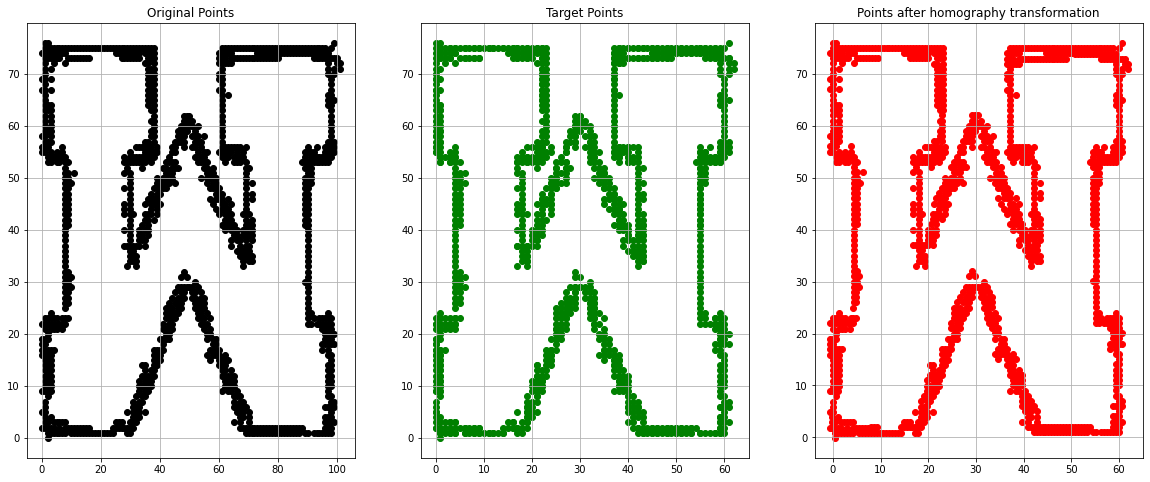

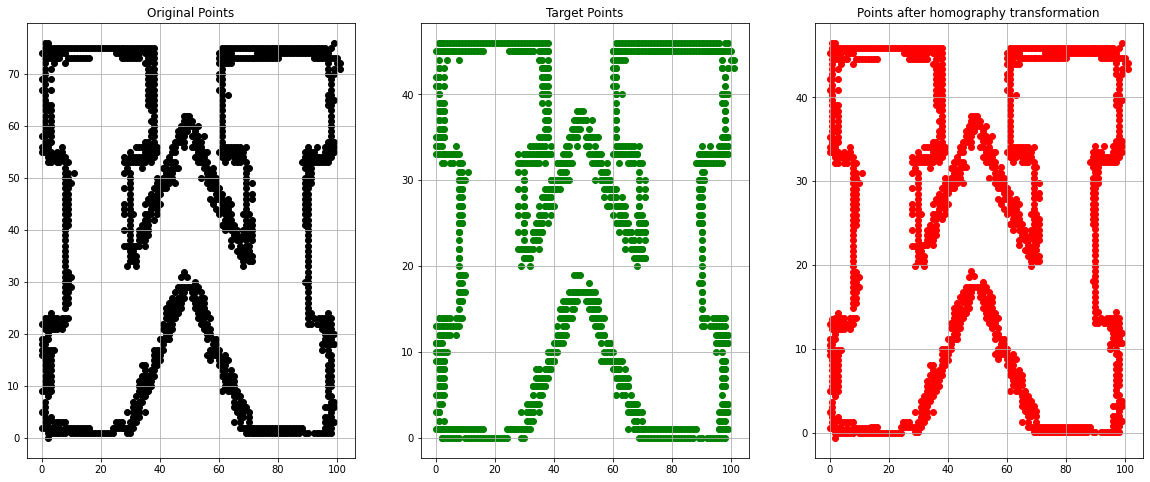

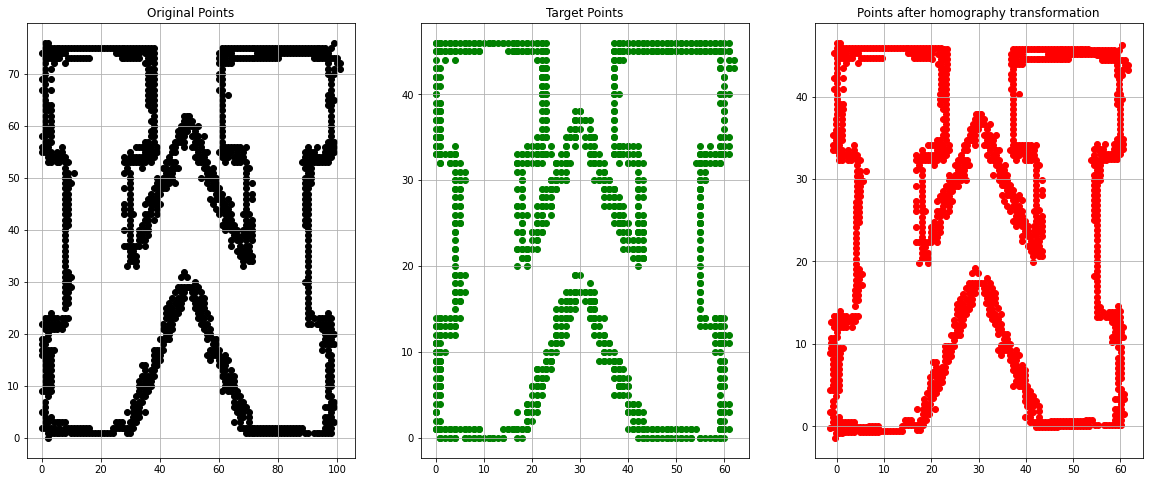

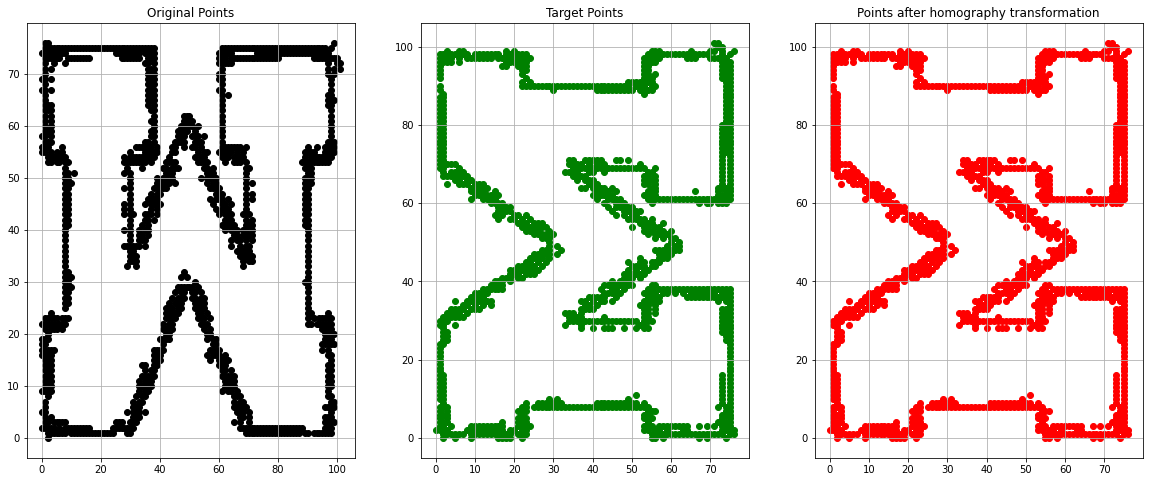

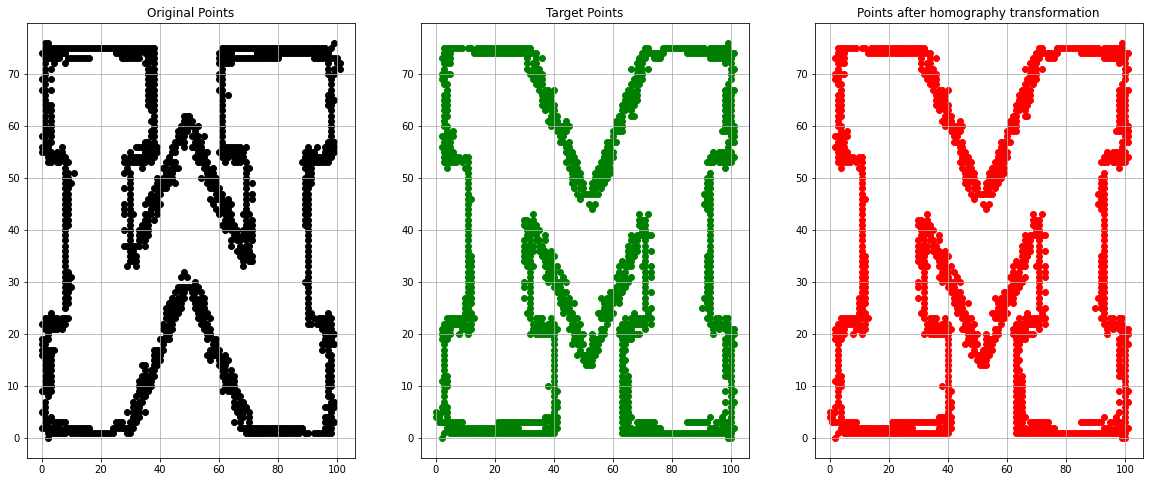

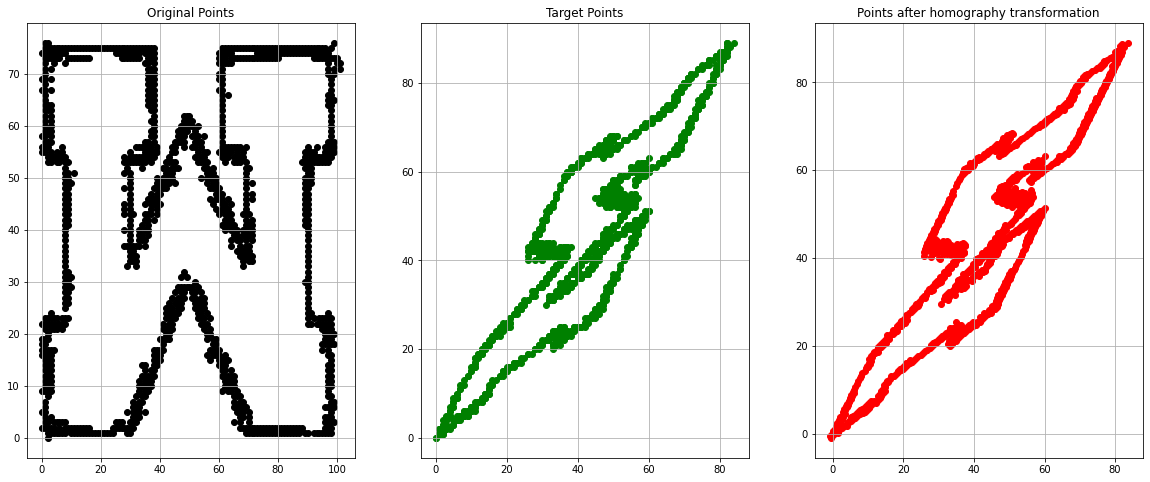

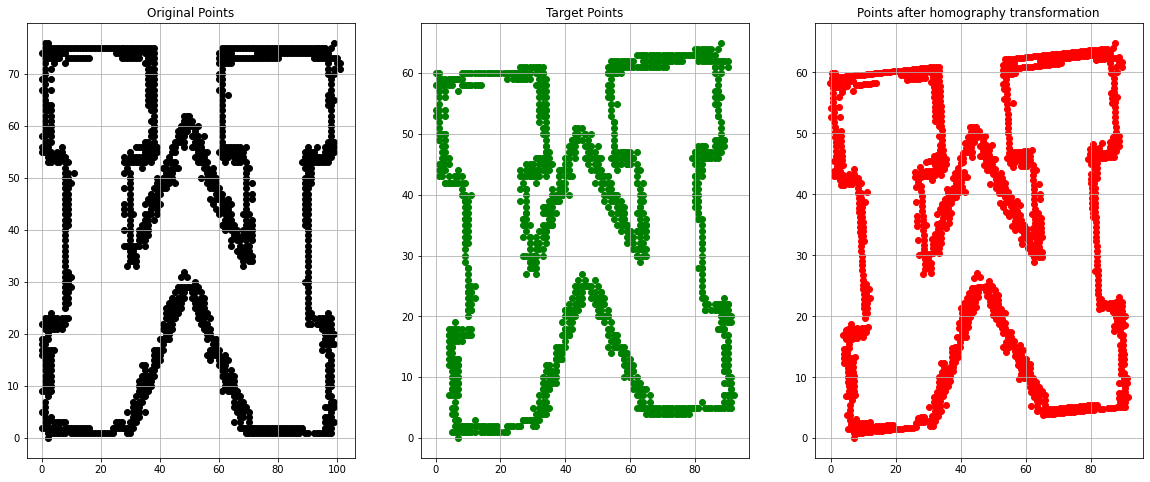

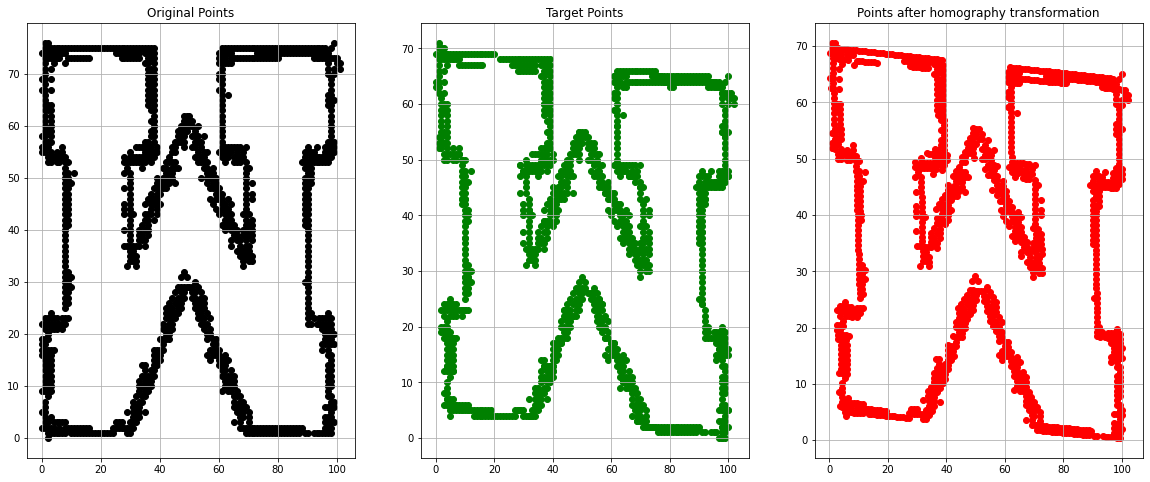

In [ ]:
if __name__ == "__main__":
    # Problem 1
    p1()

    # Problem 2
    
    # p2('uttower_left.jpg', 'uttower_right.jpg', 'uttower')
    # p2('bbb_left.jpg', 'bbb_right.jpg', 'bbb')

In [ ]:
def q_1_2(imgleft, imgright, savename): 

    save_img(imgleft, '{}q1_{}_left_grayscale.jpg'.format(path, savename))
    save_img(imgright, '{}q1__{}_right_grayscale.jpg'.format(path, savename))

    sift = cv2.xfeatures2d.SIFT_create()
    surf = cv2.xfeatures2d.SURF_create()

    keypoints_sift_left, descriptors = sift.detectAndCompute(imgleft, None)
    keypoints_sift_right, descriptors = sift.detectAndCompute(imgright, None)

    imgl = cv2.drawKeypoints(imgleft, keypoints_sift_left, None)
    imgr = cv2.drawKeypoints(imgright, keypoints_sift_right, None)
    save_img(imgl, '{}q2{}_left_sift.jpg'.format(path, savename))
    save_img(imgr, '{}q2{}_right_sift.jpg'.format(path, savename))


    keypoints_surf_left, descriptors = surf.detectAndCompute(imgleft, None)
    keypoints_surf_right, descriptors = surf.detectAndCompute(imgright, None)

    imgl = cv2.drawKeypoints(imgleft, keypoints_surf_left, None)
    imgr = cv2.drawKeypoints(imgright, keypoints_surf_right, None)
    save_img(imgl, '{}q2{}_left_surf.jpg'.format(path, savename))
    save_img(imgr, '{}q2{}_right_surf.jpg'.format(path, savename))

In [ ]:
#@title
def stitchimage(imgleft, imgright):
    # 1. extract descriptors from images
    #    you may use SIFT/SURF of opencv
    # imgleft = cv2.resize(imgleft,(600, int(600*imgleft.shape[1]/imgleft.shape[0])))
    # imgright = cv2.resize(imgright,(600, int(600*imgright.shape[1]/imgright.shape[0])))
    print(imgleft.shape)
    # grayl= cv2.cvtColor(imgleft,cv2.COLOR_BGR2GRAY)
    sift = cv2.xfeatures2d.SIFT_create()
    kpl,desl = sift.detectAndCompute(imgleft,None)
    # print(desl)
    # imgleft=cv2.drawKeypoints(imgleft,kpl,imgleft)
    # cv2.imwrite(dpath+'bbbleft_keypoints.jpg',imgleft)
    # cv2_imshow(imgleft)
    # grayr= cv2.cvtColor(imgright,cv2.COLOR_BGR2GRAY)
    sift = cv2.xfeatures2d.SIFT_create()
    kpr,desr = sift.detectAndCompute(imgright,None)
    # imgright=cv2.drawKeypoints(imgright,kpr,imgright)
    # cv2.imwrite(dpath+'bbbright_keypoints.jpg',imgright)
    # cv2_imshow(imgright)

    kpaleft = np.array([[p.pt[0],p.pt[1]] for p in kpl])
    tl = kpaleft
    X = kpaleft
    # X = ((kpaleft - np.mean(kpaleft, axis = 0))/np.std(kpaleft,axis = 0))
    kpaleft = desl[:,None,:]
    kparight = np.array([[p.pt[0],p.pt[1]] for p in kpr])
    tr = kparight
    # kparight = (kparight - np.mean(kparight, axis = 0))/np.std(kparight,axis = 0)
    Y = kparight
    kparight = np.transpose(desr[:,None,:],(1,0,2))
    # desl = ((desl - np.mean(desl, axis = 0, keepdims=True))/np.std(desl,axis = 0, keepdims=True))
    # desr = ((desr - np.mean(desr, axis = 0, keepdims=True))/np.std(desr,axis = 0, keepdims=True))
    lnorm = np.sum(desl**2, axis = 1, keepdims = True)
    rnorm = np.sum(desr**2, axis = 1, keepdims = True)
    dist = (lnorm + rnorm.T -2*(desl @ desr.T))**0.5


    print(np.min(dist),np.max(dist))
    # print(lnorm,rnorm)
    # 2. select paired descriptors

    mins = np.amin(dist,axis = 1)
    print(np.argpartition(dist,2))
    secminsargs = np.argpartition(dist,2)[:,2]
    secmins = dist[np.arange(len(dist)),secminsargs]
    print(mins.shape, secmins.shape)
    s = mins/secmins < 0.5

    print(mins, secmins)
    print("s",np.sum(s))
    # 3. run RANSAC to find a transformation
    #    matrix which has most innerliers
    bestLine, bestCount = None, -1
    bestd = 0
    id_x = np.nonzero(s)[0]

    id_y = np.argmin(dist, axis = 1)[id_x]
    assert(len(id_x) == len(id_y))
    data = np.hstack((X[id_x,:],Y[id_y,:]))
    best_dist = None
    for i in range(400):
        id_s = np.random.randint(0,len(id_x),size = 50)
        H = fit_homography(data)
        Y_h = homography_transform(X[id_x[id_s],:],H)[:,:2]
        # print(n.shape,data.shape,d.shape)
        dist = np.linalg.norm(Y_h - Y[id_y[id_s],:],axis = 1)
        ct = np.sum(dist < 20)
        if ct > bestCount:
            bestLine = H
            bestCount = ct
            best_dist = dist
        # print(dist.shape)
    # print("min dist", np.amin(dist))
    print("best c",bestCount)
    print("bestLine", bestLine)
    print("residual",np.mean(best_dist[best_dist < 20]))
    match_idx = (best_dist < 20)
    kp1 = []
    kp2 = []
    nidx  =  np.nonzero(match_idx)[0]
    # print(nidx.shape,id_x.shape)
    match1to2 = []
    midx = 0
    for i in nidx:
        kp1.append(cv2.KeyPoint(tl[id_x[i]][0],tl[id_x[i]][1],1))
        kp2.append(cv2.KeyPoint(tr[id_y[i]][0],tr[id_y[i]][1],1))
        match1to2.append(cv2.DMatch(midx,midx,dist[i]))
        midx += 1
    
    match = None
    match = cv2.drawMatches(imgleft,kp1,imgright,kp2,match1to2 ,match )
    

    # 4. warp one image by your transformation
    #    matrix
    #
    #    Hint:
    #    a. you can use function of opencv to warp image
    #    b. Be careful about final image size
    bestLine = bestLine / bestLine[2,2]
    translate = np.array([[ 1 , 0 , 0],[ 0 , 1 , 0],[ 0 , 0 ,  1 ]])
    H_inv = np.linalg.inv(bestLine)
    print(H_inv)
    warped = cv2.warpPerspective(imgright,H_inv, (600,900))
    save_img(warped, '/.warped.jpg')
    # save_img(match, dpath+'matchbox.jpg')
    cv2_imshow(warped)
    cv2_imshow(match)
    
    # 5. combine two images, use average of them
    #    in the overlap area
 
    warpleftc = cv2.warpPerspective(imgleft,translate @ bestLine, (2500,1500))
    warprightc = cv2.warpPerspective(imgright,translate.astype(np.float) , (2500,1500))
    # cv2_imshow(warpleftc)
    # cv2_imshow(warprightc)
    img = warpleftc.astype(np.int32) + warprightc.astype(np.int32)
    print("sum",np.sum(warpleftc, axis = 2).shape)
    overlap = np.logical_and(np.sum(warpleftc, axis = 2),np.sum(warprightc, axis = 2))
    print(overlap.shape,img[overlap,:].shape)
    img[overlap,:]  -= (0.5*img[overlap,:]).astype(np.int32)
    cv2_imshow(img)
    return img, bestLine


In [ ]:
def stitchimage(imgleft, imgright, iml, imr, savename):
    # 1. extract descriptors from images
    #    you may use SIFT/SURF of opencv
    print(f'Left Image Shape: {imgleft.shape}, Right Image Shape: {imgright.shape}')
     
    # imgleft = cv2.resize(imgleft,(600, int(600*imgleft.shape[1]/imgleft.shape[0])))
    # imgright = cv2.resize(imgright,(600, int(600*imgright.shape[1]/imgright.shape[0])))
    # grayl= cv2.cvtColor(imgleft,cv2.COLOR_BGR2GRAY)
    sift = cv2.xfeatures2d.SIFT_create()
    kpl,desl = sift.detectAndCompute(imgleft,None)

    # grayr= cv2.cvtColor(imgright,cv2.COLOR_BGR2GRAY)
    sift = cv2.xfeatures2d.SIFT_create()
    kpr,desr = sift.detectAndCompute(imgright,None)

    kpaleft = np.array([[p.pt[0],p.pt[1]] for p in kpl])
    tl = kpaleft
    X = kpaleft
    # X = ((kpaleft - np.mean(kpaleft, axis = 0))/np.std(kpaleft,axis = 0))
    kpaleft = desl[:,None,:]
    kparight = np.array([[p.pt[0],p.pt[1]] for p in kpr])
    tr = kparight
    # kparight = (kparight - np.mean(kparight, axis = 0))/np.std(kparight,axis = 0)
    Y = kparight
    kparight = np.transpose(desr[:,None,:],(1,0,2))
    desl = ((desl - np.mean(desl, axis = 0, keepdims=True))/np.std(desl,axis = 0, keepdims=True))
    desr = ((desr - np.mean(desr, axis = 0, keepdims=True))/np.std(desr,axis = 0, keepdims=True))
    lnorm = np.sum(desl**2, axis = 1, keepdims = True)
    rnorm = np.sum(desr**2, axis = 1, keepdims = True)
    dist = (lnorm + rnorm.T -2*(desl @ desr.T))**0.5

    print("1:")
    print(f'Distances: norm(left): {lnorm.mean()} | norm(right): {rnorm.mean()} | min : {np.min(dist)} | max: {np.max(dist)}')
    print(f'Shapes: dist: {dist.shape} | Keypoints(left): {len(kpl)} | Descriptors: {len(desl)} | Keypoints(right): {len(kpr)} | Descriptors: {len(desr)} ')
    
    # 2. select paired descriptors
    mins = np.amin(dist,axis = 1)
    # print("np.argpartition(dist,2)", np.argpartition(dist,2))
    secminsargs = np.argpartition(dist,2)[:,2]
    secmins = dist[np.arange(len(dist)),secminsargs]
    # print("mins.shape, secmins.shape", mins.shape, secmins.shape)
    s = mins/secmins < 0.5
    # print(mins, secmins)
    print("2: \nNumber of Putative matches based on 0.5 ration test: ",np.sum(s))
     

    # 3. run RANSAC to find a transformation
    #    matrix which has most innerliers
    bestLine, bestCount = None, -1
    bestd = 0
    id_x = np.nonzero(s)[0]

    id_y = np.argmin(dist, axis = 1)[id_x]
    assert(len(id_x) == len(id_y))
    data = np.hstack((X[id_x,:],Y[id_y,:]))
    best_dist = None
    for i in range(400):
        id_s = np.random.randint(0,len(id_x),size = 50)
        H = fit_homography(data)
        Y_h = homography_transform(X[id_x[id_s],:],H)[:,:2]
        # print(n.shape,data.shape,d.shape)
        dist = np.linalg.norm(Y_h - Y[id_y[id_s],:],axis = 1)
        ct = np.sum(dist < 20)
        if ct > bestCount:
            bestLine = H
            bestCount = ct
            best_dist = dist
        # print(dist.shape)
    # print("min dist", np.amin(dist))
    print("3:\nBest fit: number of inliers:",bestCount)
    print("Best fit: H:", bestLine)
    print("Best fit: average residual:",np.mean(best_dist[best_dist < 20]))
    match_idx = (best_dist < 20)
    kp1 = []
    kp2 = []
    nidx  =  np.nonzero(match_idx)[0]
    # print(nidx.shape,id_x.shape)
    match1to2 = []
    midx = 0
    for i in nidx:
        kp1.append(cv2.KeyPoint(tl[id_x[i]][0],tl[id_x[i]][1],1))
        kp2.append(cv2.KeyPoint(tr[id_y[i]][0],tr[id_y[i]][1],1))
        match1to2.append(cv2.DMatch(midx,midx,dist[i]))
        midx += 1
    
    match = None
    match = cv2.drawMatches(imgleft,kp1,imgright,kp2,match1to2 ,match )
    # save_img(match, '{}q5{}_RANSAC.jpg'.format(path, savename))
    

    # 4. warp one image by your transformation
    #    matrix
    #
    #    Hint:
    #    a. you can use function of opencv to warp image
    #    b. Be careful about final image size
    bestLine = bestLine / bestLine[2,2]
    translate = np.array([[ 1 , 0 , 0],[ 0 , 1 , 0],[ 0 , 0 ,  1 ]])
    H_inv = np.linalg.inv(bestLine)
    # print(H_inv)
    warped = cv2.warpPerspective(imgright,H_inv, (1500,900))
    cv2_imshow(warped)
    
    # 5. combine two images, use average of them
    #    in the overlap area

    width = imgleft.shape[1] + imgright.shape[1] +200
    height = imgleft.shape[0] + imgright.shape[0] +50

    # result = cv2.warpPerspective(imgright, H_inv, (width, height))
    # result[0:imgleft.shape[0], 0:imgleft.shape[1]] = imgleft

  
    warpleftc = cv2.warpPerspective(imr,translate @ H_inv, (width,height))
    warprightc = cv2.warpPerspective(iml,translate.astype(np.float) , (width,height))
    cv2_imshow(warpleftc)
    cv2_imshow(warprightc)
    # print(warpleftc.shape)
    img = warpleftc.astype(np.int32) + warprightc.astype(np.int32)
    print("sum",np.sum(warpleftc, axis = 2).shape)
    overlap = np.logical_and(np.sum(warpleftc, axis = 2),np.sum(warprightc, axis = 2))
    print(overlap.shape,img[overlap,:].shape)
    img[overlap,:]  -= (0.5*img[overlap,:]).astype(np.int32)
    cv2_imshow(img)
    return img, bestLine


In [ ]:
def p2(p1, p2, savename):
    # read left and right images
    imgleft = read_img(p1)
    imgright = read_img(p2)
    # q_1_2(imgleft, imgright, savename)

    iml = cv2.imread(p1, cv2.IMREAD_COLOR)
    imr = cv2.imread(p2, cv2.IMREAD_COLOR)
    output, H = stitchimage(imgleft, imgright, iml, imr, savename)
    return H



In [ ]:
if __name__ == "__main__":
    # Problem 1
    # p1()

    # Problem 2
    
    # p2('uttower_left.jpg', 'uttower_right.jpg', 'uttower')
    p2('bbb_left.jpg', 'bbb_right.jpg', 'bbb')
  

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
if __name__ == "__main__":
    # Problem 1
    # p1()

    # Problem 2
    
    p2('uttower_left.jpg', 'uttower_right.jpg', 'uttower')
    # p2('bbb_left.jpg', 'bbb_right.jpg', 'bbb')
  

Output hidden; open in https://colab.research.google.com to view.

(683, 1024)
28.7054 708.93585
[[ 514 1478 1076 ... 4192 4193 4194]
 [4131 3774 2287 ... 4192 4193 4194]
 [3035 1537 1867 ... 4192 4193 4194]
 ...
 [2059 1567  135 ... 4192 4193 4194]
 [1223 3492  783 ... 4192 4193 4194]
 [1679 1190  187 ... 4192 4193 4194]]
(5317,) (5317,)
[276.95126 404.2561  333.29266 ... 251.87894 328.97568 312.78107] [286.8693  416.32318 354.95773 ... 363.842   339.63364 350.12854]
s 786
best c 50
bestLine [[ 2.14692679e-03 -1.09146952e-04 -9.57206581e-01]
 [ 2.86275210e-04  2.02629778e-03 -2.89385770e-01]
 [ 4.74589849e-07  7.02273696e-08  1.62090491e-03]]
residual 0.7330359313386249
[[ 6.64440062e-01  2.20547331e-02  3.96314875e+02]
 [-1.20907652e-01  7.91001684e-01  6.98196613e+01]
 [-1.89305048e-04 -4.07284349e-05  8.80936712e-01]]
/.warped.jpg is saved!


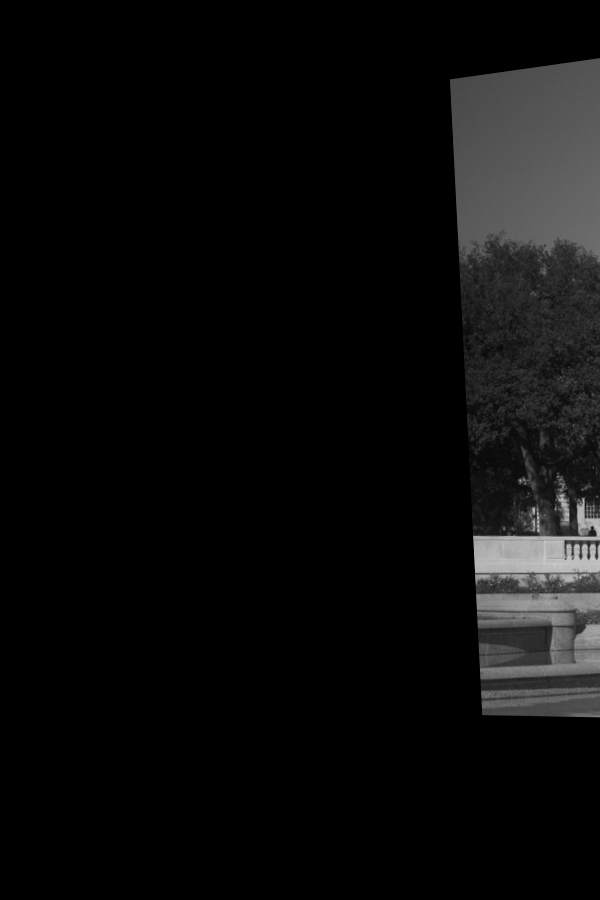

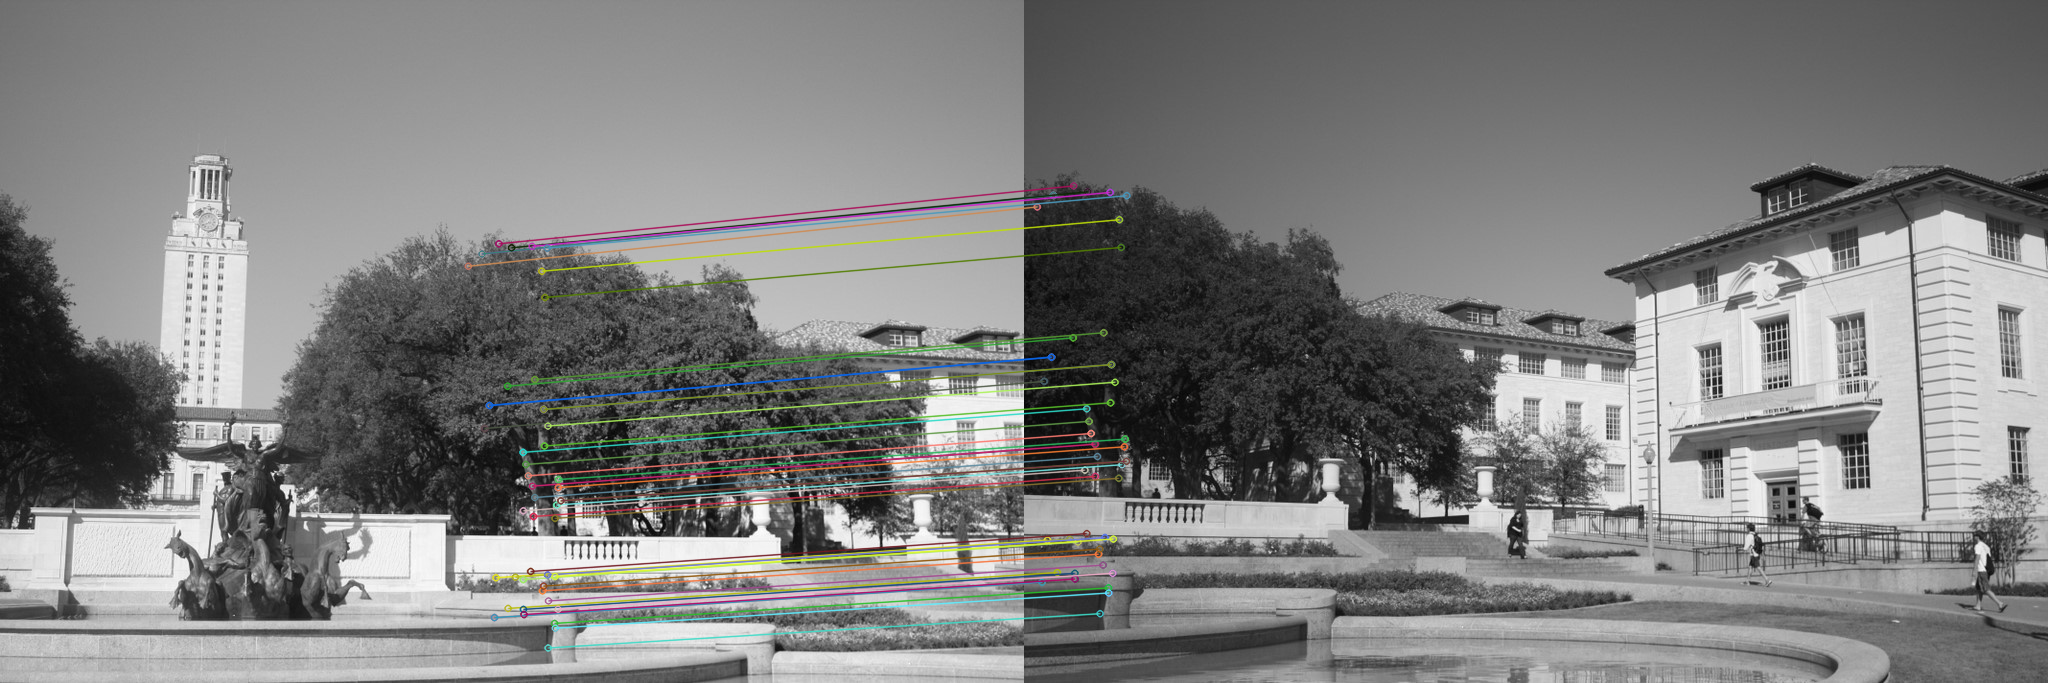

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:114: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


AxisError: ignored

In [ ]:
if __name__ == "__main__":
    # Problem 1
    # p1()

    # Problem 2
    
    p2('uttower_left.jpg', 'uttower_right.jpg', 'uttower')
    p2('bbb_left.jpg', 'bbb_right.jpg', 'bbb')
    
    # Problem 3
    # add your code for implementing Problem 3
    #
    # front = read_img(dpath+'tree_front.jpg')
    # side = read_img(dpath+'tree_left.jpg')
    # mark = read_img(dpath+'mark.jpg')
    # H = fit_homography(np.array([[0,0,184,408],[400,0,314,410],[400,400,318,539],[0,400,180,539]]))
    # H = H/H[2,2]
    # print(H)
    # changed_mark = cv2.warpPerspective(mark,H, (600,800))
    # mark_front = changed_mark*0.6+front
    # cv2_imshow(mark_front)
    # save_img(mark_front, dpath+'mark_front.jpg')
    # Z = p2(dpath+'tree_front.jpg', dpath+'tree_left.jpg', 'tree')
    # changed_mark = cv2.warpPerspective(mark,Z@H, (600,800))
    # mark_side = changed_mark*0.6+side
    # cv2_imshow(mark_side)
    # save_img(mark_side, dpath+'mark_side.jpg')